## Objective: predict the price of a house

### Secondary: explore characteristics of house using BI tools. 
- understanding which factors are responsible for higher property value - $650K and above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as map
from matplotlib import pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_excel("data/regression_data.xls")

# EDA

In [3]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
data.shape

(21597, 21)

In [6]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [9]:
# drop unecessary colums 
data_cleaned = data.drop(columns=["id"])

## Price

In [113]:
x = (data[data["bedrooms"] ==3]["price"].max())

print(x)

3800000


In [118]:
x = (data[data["bedrooms"] ==4]["price"].max())

print(x)

4490000


In [119]:
x = (data[data["bedrooms"] ==4].max())

print(x)

id                        9839300775
date             2015-05-27 00:00:00
bedrooms                           4
bathrooms                       5.75
sqft_living                     7850
sqft_lot                     1651359
floors                           3.0
waterfront                         1
view                               4
condition                          5
grade                             13
sqft_above                      7850
sqft_basement                   3500
yr_built                        2015
yr_renovated                    2015
zipcode                        98199
lat                          47.7776
long                        -121.691
sqft_living15                   6210
sqft_lot15                    871200
price                        4490000
dtype: object


In [10]:
print("max price: $", data.price.max()) # $7.7 million

max price: $ 7700000


In [11]:
data_cleaned["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [12]:
print("Mean House Price:", round(data.price.mean(),2))
print("Median House Price:", round(data.price.median(),2))

Mean House Price: 540296.57
Median House Price: 450000.0


Text(0.5, 1.0, 'House Prices')

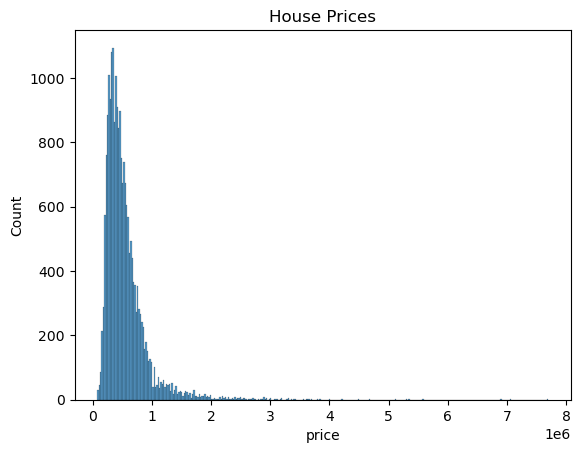

In [13]:
sns.histplot(
    x="price",
    data=data
)
plt.title("House Prices")

Text(0.5, 1.0, 'House Prices')

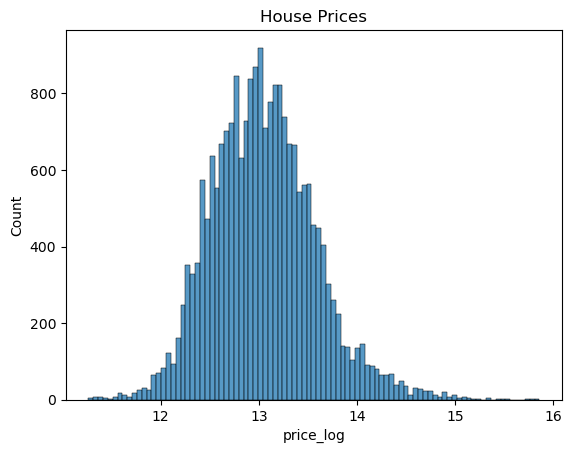

In [14]:
# use Log Transform to deal with price outliers

data_cleaned["price_log"] = np.log1p(data["price"])



# outcome: data is now normal

sns.histplot(
    x="price_log",
    data=data_cleaned
)
plt.title("House Prices")

In [15]:
data_cleaned = data_cleaned.drop(columns={"price"})

# Categorical Variables

### Zip codes

<Axes: xlabel='zipcode', ylabel='Count'>

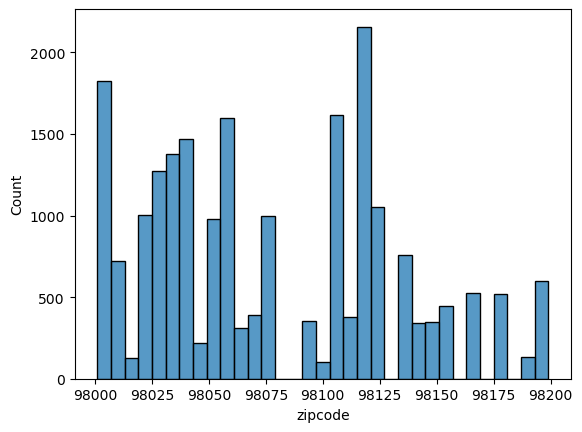

In [16]:
data_cleaned.zipcode.nunique()

sns.histplot(x="zipcode",
             data=data) 

# will drop for linear regression

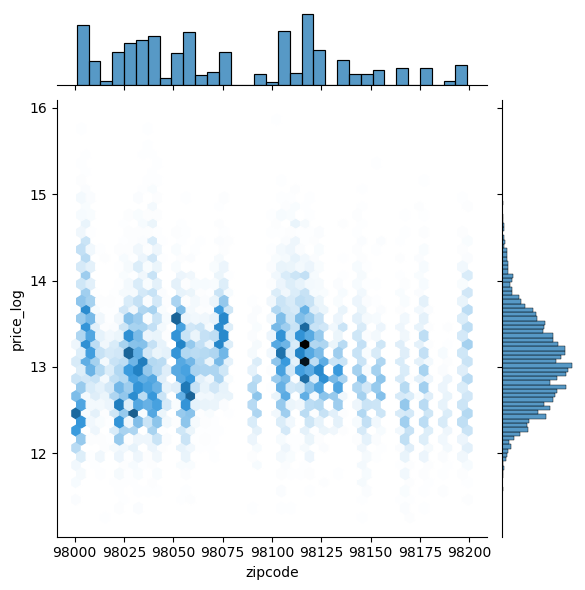

In [17]:
sns.jointplot(x="zipcode",
              y="price_log",
              data=data_cleaned,
              kind="hex")

# hashtrick 
# target encoding

In [18]:
data_cleaned.zipcode.value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

## Condition

In [19]:
data_cleaned.condition.value_counts() # condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='price'>

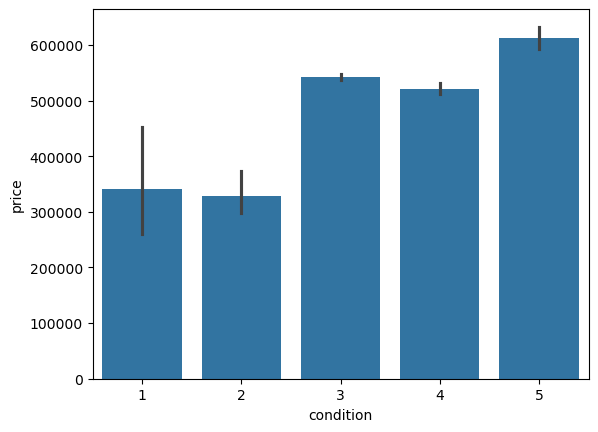

In [20]:
sns.barplot(x="condition",
            y="price",
            data=data)

## Waterfronts

In [21]:
data_cleaned.waterfront.value_counts()

waterfront
0    21434
1      163
Name: count, dtype: int64

<Axes: xlabel='waterfront', ylabel='price'>

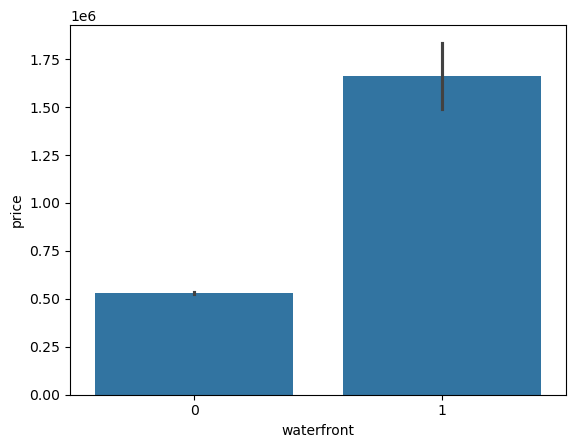

In [22]:
sns.barplot(x="waterfront",
            y="price",
            data=data)

### View

In [23]:
data_cleaned.view.value_counts()

view
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

Text(0, 0.5, 'Price of house')

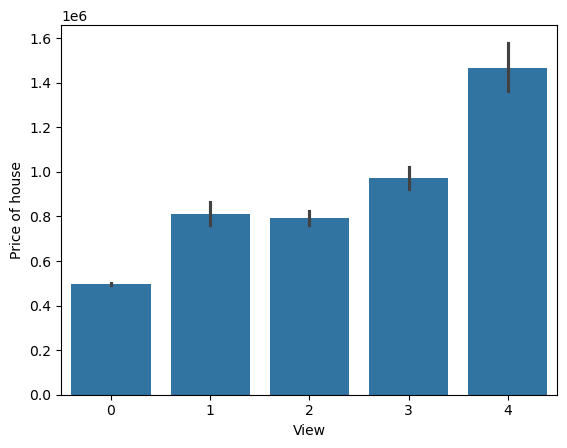

In [24]:
sns.barplot(x="view", 
            y="price",
            data=data)
plt.xlabel("View")
plt.ylabel("Price of house")

## Grade

In [25]:
data_cleaned.grade.value_counts() 
# Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

Text(0, 0.5, 'Price of house')

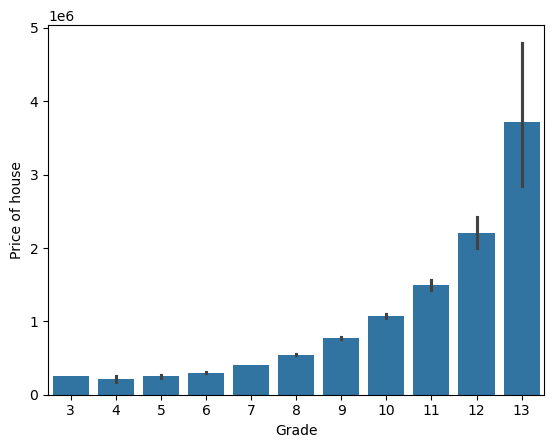

In [26]:
sns.barplot(x="grade", 
            y="price",
            data=data)
plt.xlabel("Grade")
plt.ylabel("Price of house")

## Year rennovated

In [27]:
data_cleaned.yr_renovated.value_counts()
# huge amount of 0, which in this case is likely NaN. Drop for linear regression

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [28]:
data_cleaned.yr_built.value_counts().head(20)

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    317
1962    312
1954    305
2001    305
1987    294
1989    290
1969    280
Name: count, dtype: int64

<Axes: xlabel='yr_built', ylabel='Count'>

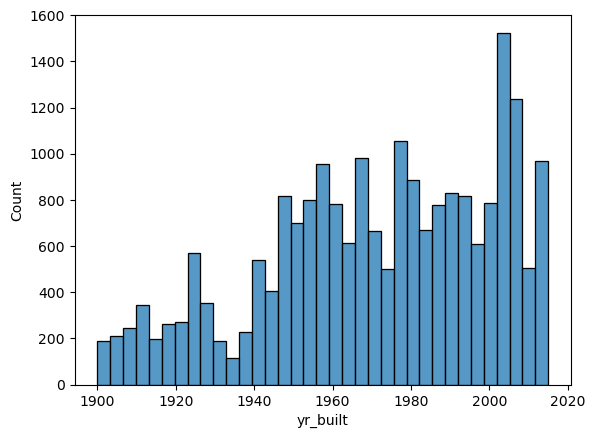

In [29]:
sns.histplot(x="yr_built",
             data=data)

<Axes: xlabel='yr_built'>

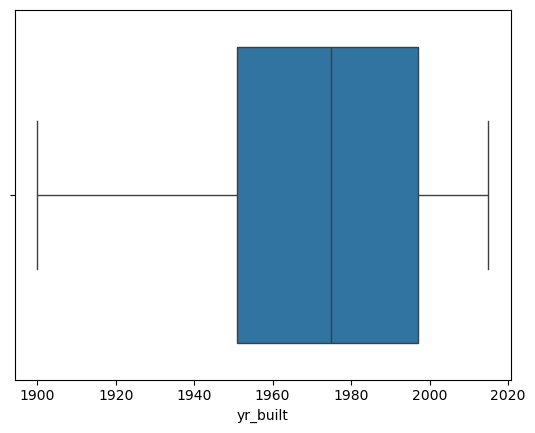

In [30]:
sns.boxplot(x="yr_built",
             data=data)

In [31]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

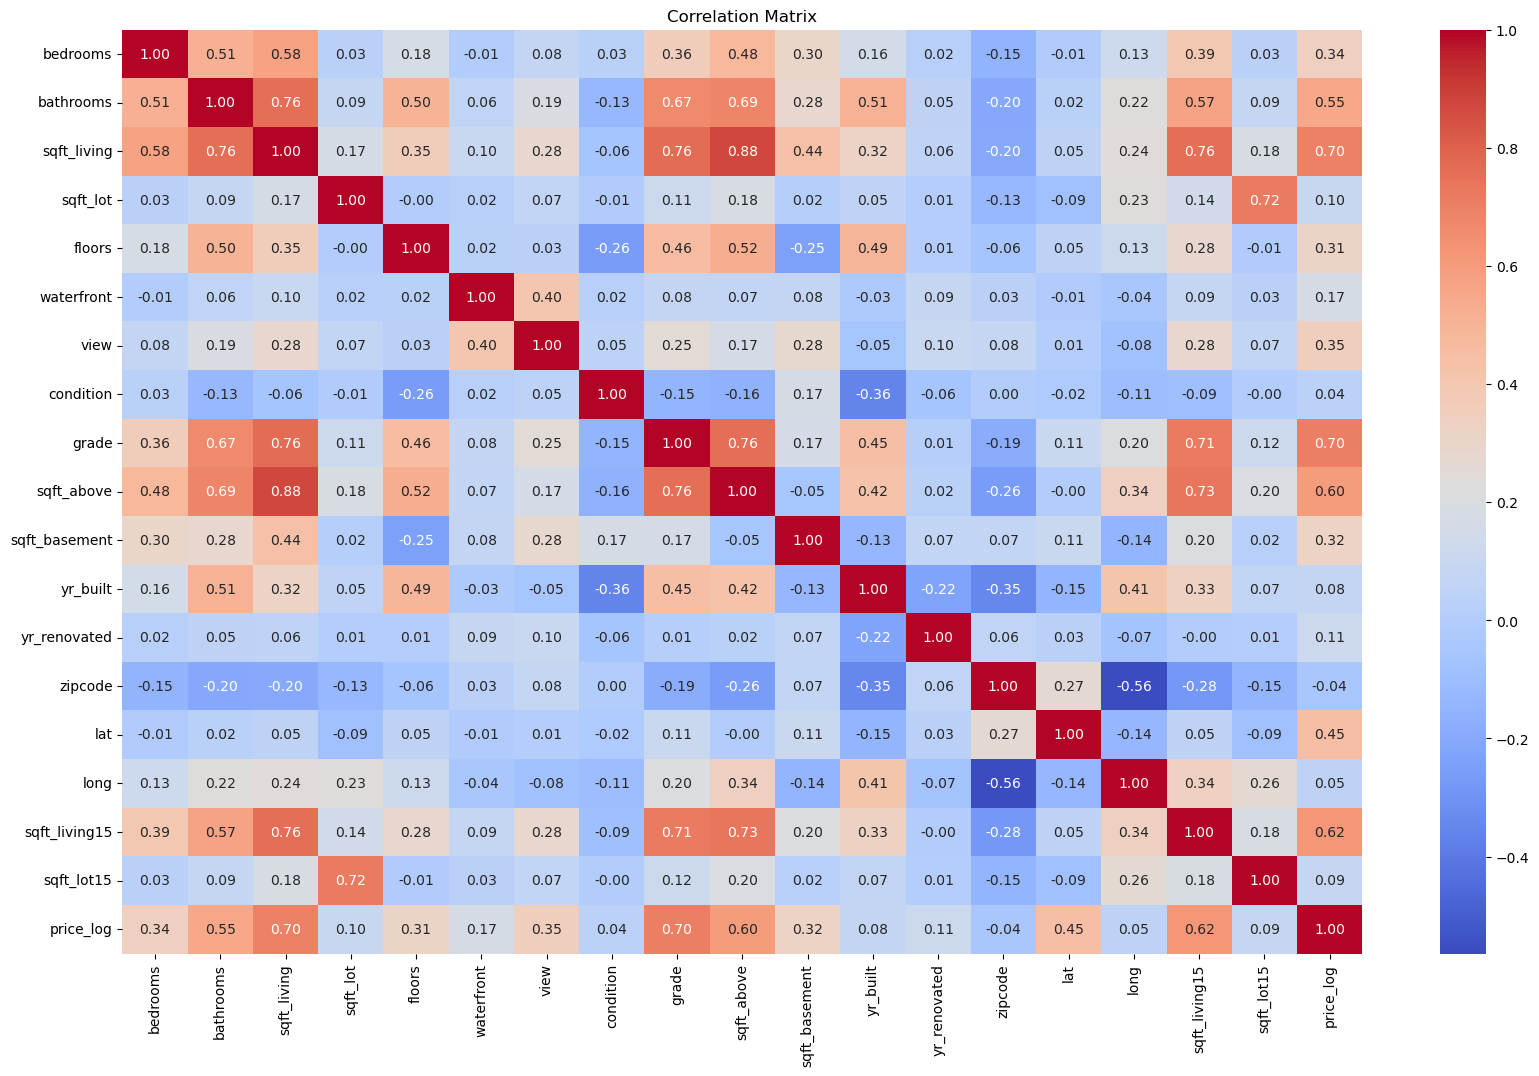

In [32]:
correlation = data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(20, 12))
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlates 

#### Med to high correlation with target variable: price
- sqft_living: 0.70
- grade: 0.67
- sqft_above: 0.61

#### Dropping correlates (correlate with each other)
- sqft_living & sqft_above: 0.88  (drop sqft_above)
- sqft_living & bathrroms: 0.76
- sqft_lving & grade: 0.76


#### Interactions (correlate moderately with each other and correlate strongly with the target):


In [33]:
crosstab = round((pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"], normalize="index") * 100), 3)

crosstab

view,0,1,2,3,4
waterfront,,,,,
0,90.86,1.544,4.446,2.291,0.858
1,0.00,0.613,4.908,11.656,82.822


In [34]:
crosstab = pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"])

crosstab

view,0,1,2,3,4
waterfront,,,,,
0,19475,331,953,491,184
1,0,1,8,19,135


In [35]:
data_cleaned["sqft_grade"] = data_cleaned["sqft_living"] * data_cleaned["grade"]

In [36]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [37]:
crosstab = pd.crosstab(data_cleaned["waterfront"], data_cleaned["view"])


from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

print("Chi2-stat:", chi2_statistic) 
print("P-value:", chi2_p_value)

Chi2-stat: 7566.88988438114
P-value: 0.0


In [38]:
data_cleaned.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [39]:
data.bedrooms.value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [40]:
crosstab = round(pd.crosstab(data_cleaned["bedrooms"], data_cleaned["bathrooms"], normalize="index"), 2) * 100

crosstab

bathrooms,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,...,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.50,7.75,8.00
bedrooms,,,,,,,,,,,,,,,,,,,,,
1,1.0,14.0,70.0,1.0,6.0,2.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,56.0,0.0,11.0,11.0,8.0,4.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,18.0,0.0,8.0,19.0,11.0,11.0,24.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.0,0.0,4.0,10.0,8.0,10.0,36.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,3.0,0.0,3.0,8.0,7.0,7.0,18.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,2.0,0.0,2.0,6.0,9.0,6.0,11.0,11.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,5.0,0.0,0.0,8.0,5.0,8.0,...,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0


- Bedrooms and bathrooms show a clear, structured relationship: more bedrooms generally mean more bathrooms.

- There is noise and some spread, but the pattern is consistent for normal-sized houses.
- One extreme outlier (33 bedrooms) massively distorts the regression line and should be removed or handled before modeling.

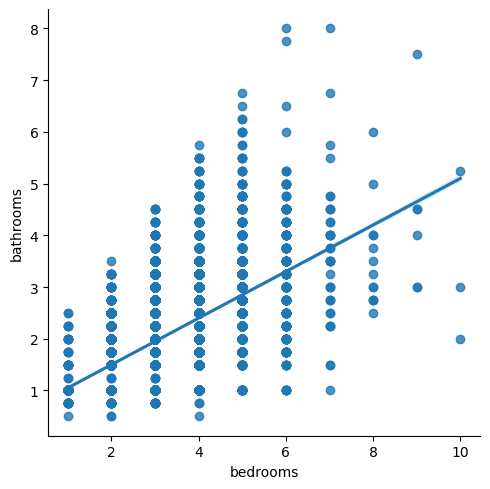

In [41]:
sns.lmplot(data=data_cleaned[data_cleaned["bedrooms"] <= 10],
           x="bedrooms", y="bathrooms")

In [42]:
# prep linear regression model 

# drop target + lat & long and redundant feature 
X = data_cleaned.drop(columns={"price_log", "lat", "long", "sqft_above", "zipcode", 'date', "yr_built", "yr_renovated", "waterfront"})
y = data_cleaned["price_log"]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [45]:
model = LinearRegression()

# Cross-validate (default is 5-fold)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("CV scores:", scores)
print("Mean CV score:", scores.mean())

model.fit(X_train_scaled, y_train)

CV scores: [0.59111114 0.60850272 0.61038909 0.6012032  0.5930955 ]
Mean CV score: 0.6008603299929154


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = model.score(X_train_scaled, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

# model is underfitting

RMSE train: 0.3330571936851711
MSE train: 0.1109270942654416
R2 train: 0.6016379143486251
RMSE test: 0.3341277348492733
MSE test: 0.11164134319550628
R2 test: 0.5900827483269624


In [47]:
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

bedrooms: -0.0246
bathrooms: -0.0122
sqft_living: 0.2079
sqft_lot: 0.0101
floors: 0.0405
view: 0.0614
condition: 0.0628
grade: 0.2311
sqft_basement: 0.0543
sqft_living15: 0.0635
sqft_lot15: -0.0241
sqft_grade: -0.0935


# KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X = data_cleaned.drop(columns={"price_log", "lat", "long", "sqft_above", "zipcode", 'date', "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validate (default is 5-fold)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("CV scores:", scores)
print("Mean CV score:", scores.mean())

knn = KNeighborsRegressor(
    n_neighbors=25
)

knn.fit(X_train_scaled, y_train)

from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = knn.predict(X_test_scaled)
y_train_pred = knn.predict(X_train_scaled)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = knn.score(X_train_scaled, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)


CV scores: [0.59480645 0.60984267 0.61004868 0.60808218 0.59584097]
Mean CV score: 0.603724189375237
RMSE train: 0.30436474985275624
MSE train: 0.09263790095293088
R2 train: 0.6663920574341764
RMSE test: 0.31785832085582927
MSE test: 0.1010339121372873
R2 test: 0.6302899279647832


In [49]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [50]:
from sklearn.tree import DecisionTreeRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, random_state=42, test_size=0.2)

dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [51]:
y_pred = dt_model.predict(X_test)

y_train_pred = dt_model.predict(X_train)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = dt_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)


RMSE train: 0.24458866615572603
MSE train: 0.059823615611837196
R2 train: 0.7851610515523789
RMSE test: 0.25009185323356975
MSE test: 0.0625459350538014
R2 test: 0.7703479995249056


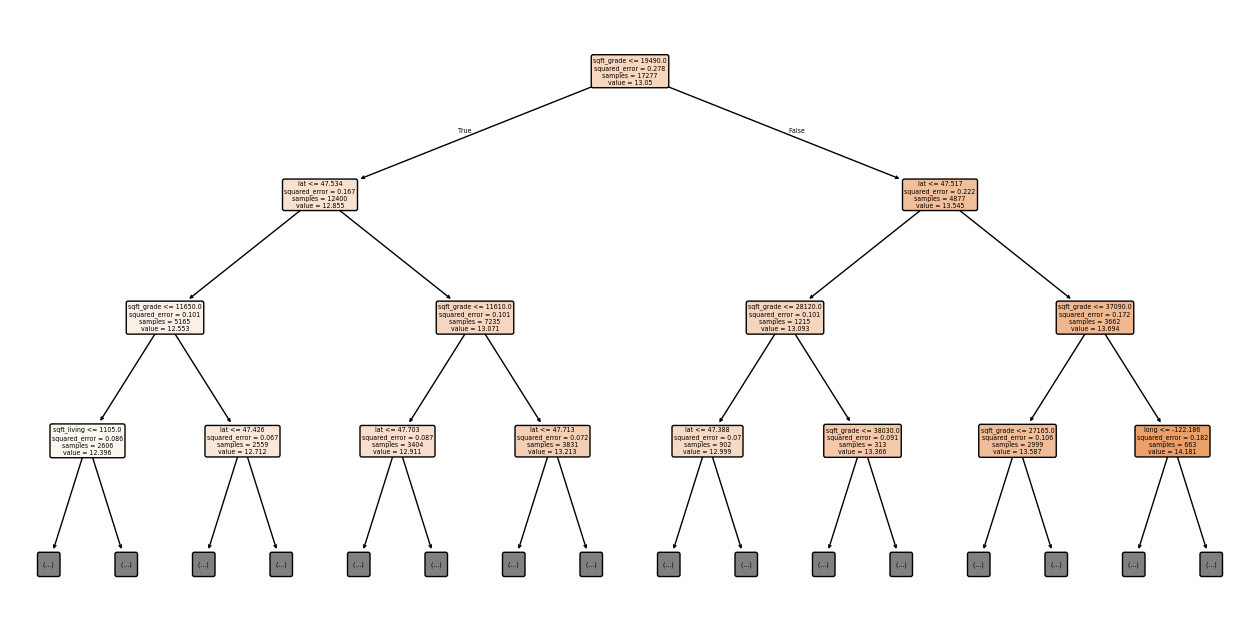

In [52]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
tree.plot_tree(dt_model, filled=True,
    feature_names=getattr(dt_model, "feature_names_in_", None),  # or X.columns
    rounded=True, max_depth=3
)
plt.show()


# Decison Tree with GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

X = data_cleaned.drop(columns={"date", "price_log"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_root_mean_squared_error'
    n_jobs=-1  # use all CPU cores
)

# Fit it
grid_search.fit(X_train, y_train)

# Get best parameters and model
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)


rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: -0.04545043178785668
RMSE train: 0.1707160062235503
MSE train: 0.029143954780919263
R2 train: 0.8957892522256372
RMSE test: 0.21078961597642104
MSE test: 0.04443226220348706
R2 test: 0.8339225961540477


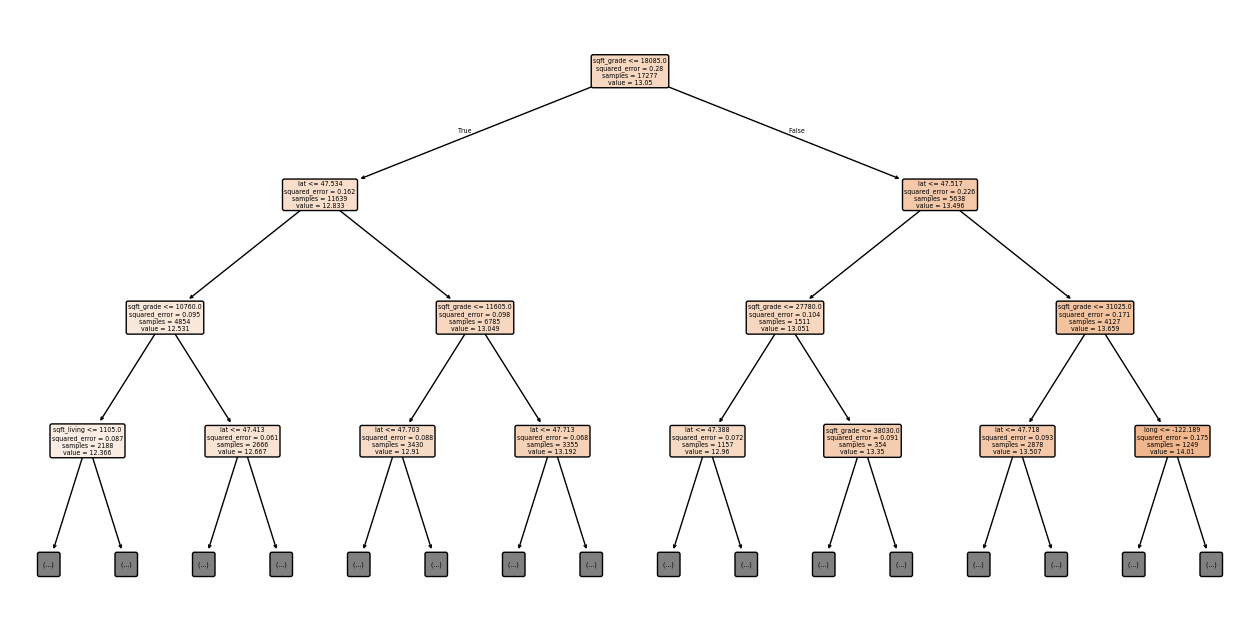

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
tree.plot_tree(best_model, filled=True,
    feature_names=getattr(best_model, "feature_names_in_", None),  # or X.columns
    rounded=True, max_depth=3
)
plt.show()


# Decision Tree GridSearchCV: Light Model

In [55]:
from sklearn.model_selection import GridSearchCV

X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # or 'r2', 'neg_root_mean_squared_error'
    n_jobs=-1  # use all CPU cores
)

# Fit it
grid_search.fit(X_train, y_train)


# Get best parameters and model
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: -0.04506271157573295
RMSE train: 0.1682687920061338
MSE train: 0.028314386363203513
R2 train: 0.8983171958097653
RMSE test: 0.21034161033569143
MSE test: 0.04424359303861185
R2 test: 0.8375493204988766


# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]


X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [5, 10, 15],
    "n_estimators": [100, 300],
    "max_features": ['sqrt', 0.5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42,
    bootstrap=True),
    n_jobs=1,
    cv=5,
    scoring='r2',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 15, 'max_features': 0.5, 'n_estimators': 300}
Best score: 0.8891082015263816


In [57]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

RMSE train: 0.09557233601417076
MSE train: 0.009134071411205561
R2 train: 0.9671976647188707
RMSE test: 0.1722052850533283
MSE test: 0.029654660200298052
R2 test: 0.891115992869089


# Less Complex Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

X_tree = data_cleaned.drop(columns={"date", "price_log"})
y_tree = data_cleaned["price_log"]


X = data_cleaned.drop(columns={"date", "price_log"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [5, 10],
    "n_estimators": [300],
    "max_features": ['log2', 0.5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42,
    bootstrap=True),
    n_jobs=1,
    cv=5,
    scoring='r2',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 300}
Best score: 0.8780532463232653


In [59]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

RMSE train: 0.15007280751055674
MSE train: 0.022521847554100617
R2 train: 0.9191193979813015
RMSE test: 0.18143106092813288
MSE test: 0.03291722986950787
R2 test: 0.8791367067559483


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [3, 5, 7],
    "n_estimators": [200, 300, 500],
    "max_features": ['log2', 0.5],
    "learning_rate": [0.1, 0.05, 0.001, 0.0001, 0.00001],
    
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    n_jobs=-1,
    cv=5,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500}
Best score: 0.8989018817633792
RMSE train: 0.10239109100430688
MSE train: 0.010483935517052251
R2 train: 0.9623500241662006
RMSE test: 0.16406327782078892
MSE test: 0.02691675912930137
R2 test: 0.9011688357519467


In [61]:
y_pred_dollars = np.exp(y_pred)
y_test_dollars = np.exp(y_test)
rmse_dollars = np.sqrt(mean_squared_error(y_test_dollars, y_pred_dollars))

print("Error in $USD:", round(rmse_dollars))

Error in $USD: 117867


- Gradient Boosting is our best model so far.
- The model is off by $117,867 per house prediction (RMSE)
- MAPE: 12% off on average
- Model explains 90% of the variance in house prices

In [91]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_dollars, y_pred_dollars)
print("MAPE:", round(mape * 100))

# MAPE accounts for the fact that expensive houses can absorb bigger dollar errors. 
# A $50k miss on a $500k house is better than a $50k miss on a $200k house.

MAPE: 12


In [79]:
for name, importance in zip(X_train.columns, best_model.feature_importances_):
    print(f"{name}: {importance:.4f}")

bedrooms: 0.0047
bathrooms: 0.0197
sqft_living: 0.1012
sqft_lot: 0.0197
floors: 0.0046
waterfront: 0.0085
view: 0.0233
condition: 0.0092
grade: 0.2063
sqft_basement: 0.0059
zipcode: 0.0326
lat: 0.2776
long: 0.0405
sqft_living15: 0.0606
sqft_lot15: 0.0162
sqft_grade: 0.1697


In [63]:
# basyen hyperparameter tuning
# scatter plot y_pred y_actual 
# optimize for MSE 
# MAE 
# MAPE
# RMSE 

# Run Optuna for Gradient Boosting Regressor to Minimize MSE

In [80]:
import optuna

def objective(trial):

    
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = int(trial.suggest_float("max_depth", 2, 15))
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.3)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)

    clf = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, max_features=max_features, min_samples_split=min_samples_split)

    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=5, scoring="neg_mean_squared_error").mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial

print("Accuracy: {}". format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2025-12-08 11:26:07,222] A new study created in memory with name: no-name-a6db19ec-f793-41ea-b4a0-78b32a838208
[I 2025-12-08 11:26:12,234] Trial 0 finished with value: -0.0371629676063729 and parameters: {'n_estimators': 134, 'max_depth': 13.849233972553545, 'learning_rate': 0.2875692570472258, 'max_features': 'log2', 'min_samples_split': 4}. Best is trial 0 with value: -0.0371629676063729.
[I 2025-12-08 11:26:31,604] Trial 1 finished with value: -0.03448124940146135 and parameters: {'n_estimators': 885, 'max_depth': 11.90076582637348, 'learning_rate': 0.24426853901732778, 'max_features': 'sqrt', 'min_samples_split': 20}. Best is trial 1 with value: -0.03448124940146135.
[I 2025-12-08 11:26:36,974] Trial 2 finished with value: -0.0335701830206625 and parameters: {'n_estimators': 285, 'max_depth': 8.701398888149775, 'learning_rate': 0.2604710533309169, 'max_features': 'log2', 'min_samples_split': 9}. Best is trial 2 with value: -0.0335701830206625.
[I 2025-12-08 11:26:41,853] Trial 3

Accuracy: -0.027636676195729272
Best hyperparameters: {'n_estimators': 735, 'max_depth': 7.330506278208182, 'learning_rate': 0.02450686203915719, 'max_features': 'sqrt', 'min_samples_split': 5}


In [81]:
from sklearn.ensemble import GradientBoostingRegressor

X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


optuna = GradientBoostingRegressor(
    n_estimators=trial.params["n_estimators"],
    max_depth= int(trial.params['max_depth']),
    learning_rate=trial.params["learning_rate"],
    max_features=trial.params["max_features"],
    
)
optuna.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.02450686203915719
,n_estimators,735
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,7
,min_impurity_decrease,0.0
,init,None


In [82]:
y_pred = optuna.predict(X_test)

y_pred_train = optuna.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = optuna.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

RMSE train: 0.11154024112901627
MSE train: 0.012441225391119092
R2 train: 0.9553209923356923
RMSE test: 0.16379295236050245
MSE test: 0.02682813124296983
R2 test: 0.901494253724776


In [83]:
y_pred_dollars = np.exp(y_pred)
y_test_dollars = np.exp(y_test)
rmse_dollars = np.sqrt(mean_squared_error(y_test_dollars, y_pred_dollars))

print("Error in $USD:", round(rmse_dollars))

Error in $USD: 120816


# GB Regressor with More Features

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

X = data_cleaned.drop(columns={"date", "price_log", "sqft_above", "yr_built", "yr_renovated"})
y = data_cleaned["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "max_depth": [3, 5, 7],
    "n_estimators": [200, 300, 500],
    "max_features": ['log2', 0.5],
    "learning_rate": [0.1, 0.05, 0.001, 0.0001, 0.00001],
    
}

grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    n_jobs=-1,
    cv=5,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = best_model.score(X_train, y_train)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("RMSE train:", rmse_train)
print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("RMSE test:", rmse)
print("MSE test:", mse)
print("R2 test:", r2)

Best params: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500}
Best score: -0.028147255210936167
RMSE train: 0.10239109100430688
MSE train: 0.010483935517052251
R2 train: 0.9623500241662006
RMSE test: 0.16406327782078892
MSE test: 0.02691675912930137
R2 test: 0.9011688357519467


In [126]:
y_pred_dollars = np.exp(y_pred)
y_test_dollars = np.exp(y_test)
rmse_dollars = np.sqrt(mean_squared_error(y_test_dollars, y_pred_dollars))

print("Error in $USD:", round(rmse_dollars))

Error in $USD: 123929


In [127]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_dollars, y_pred_dollars)
print("MAPE:", round(mape * 100))

# MAPE accounts for the fact that expensive houses can absorb bigger dollar errors. 
# A $50k miss on a $500k house is better than a $50k miss on a $200k house.

MAPE: 12


In [128]:
for name, importance in zip(X_train.columns, best_model.feature_importances_):
    print(f"{name}: {importance:.4f}")

bedrooms: 0.0022
bathrooms: 0.0130
sqft_living: 0.2364
sqft_lot: 0.0147
floors: 0.0015
waterfront: 0.0079
view: 0.0153
condition: 0.0073
grade: 0.2424
sqft_basement: 0.0039
zipcode: 0.0203
lat: 0.3074
long: 0.0463
sqft_living15: 0.0634
sqft_lot15: 0.0179
